# Importing common libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

# DF1 - Earning/ Hours worked in Construction in Ireland

In [2]:
##JSON file format

!conda install pyjstat

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - pyjstat

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
#from pyjstat import pyjstat

#request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BDA01/JSON-stat/2.0/en'
# read json data
#dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
#df1 = dataset.write('dataframe')

In [123]:
##Alternative way to the above code, revisit to ensure best option has been chosen.

from pyjstat import pyjstat

request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.PxAPIv1/en/27/EHWC/BDA01?query=%7B%22query%22:%5B%7B%22code%22:%22STATISTIC%22,%22selection%22:%7B%22filter%22:%22item%22,%22values%22:%5B%22BDA01C3%22%5D%7D%7D%5D,%22response%22:%7B%22format%22:%22json-stat2%22,%22pivot%22:null%7D%7D'
df = pd.read_json
# read json data
dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
df1 = dataset.write('dataframe')

In [150]:
df1.head()

,Type of Worker,Year,Statistic,value
0,All manual employee grades,1969,Average Hours Worked per Week in the Building ...,NaN
1,All manual employee grades,1970,Average Hours Worked per Week in the Building ...,NaN
2,All manual employee grades,1971,Average Hours Worked per Week in the Building ...,NaN
3,All manual employee grades,1972,Average Hours Worked per Week in the Building ...,NaN
4,All manual employee grades,1973,Average Hours Worked per Week in the Building ...,NaN


In [151]:
#To determine the variables in the statistic column.

df1label = df1.groupby(by=['Statistic']).size()
print(df1label)

Statistic
Average Hours Worked per Week in the Building and Construction Industry    360
dtype: int64


In [152]:
df1label = df1.groupby(by=['Type of Worker']).size()
print(df1label)

Type of Worker
All employees (clerical and operatives)    40
All manual employee grades                 40
Apprentices                                40
Clerical employees - female                40
Clerical employees - male                  40
Foremen and supervisors                    40
Skilled operatives                         40
Unskilled and semi-skilled - adults        40
Unskilled and semi-skilled - juveniles     40
dtype: int64


In [153]:
##Dropping the Average weekly earning rows from the dataframe as it already contains hours worked and hourly rate.

df1C = df1.drop(df1[df1["Statistic"]=="Average Earnings per Week in the Building and Construction Industry"].index)

In [154]:
df1C.head()

,Type of Worker,Year,Statistic,value
0,All manual employee grades,1969,Average Hours Worked per Week in the Building ...,NaN
1,All manual employee grades,1970,Average Hours Worked per Week in the Building ...,NaN
2,All manual employee grades,1971,Average Hours Worked per Week in the Building ...,NaN
3,All manual employee grades,1972,Average Hours Worked per Week in the Building ...,NaN
4,All manual employee grades,1973,Average Hours Worked per Week in the Building ...,NaN


In [155]:
df1C.dtypes

Type of Worker     object
Year                int64
Statistic          object
value             float64
dtype: object

In [156]:
#Count the number of null values.

df1null = df1C.isnull().sum()

In [157]:
df1null

##High number of NaN values in the value column. 

Type of Worker      0
Year                0
Statistic           0
value             119
dtype: int64

<AxesSubplot:xlabel='value', ylabel='Count'>

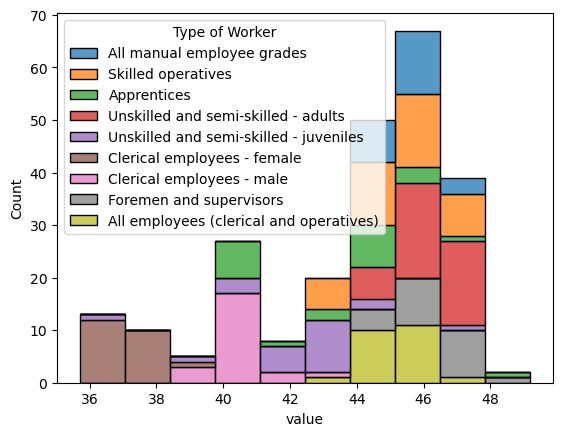

In [158]:
sns.histplot(data=df1, x='value', hue='Type of Worker', multiple='stack')
##REF-https://realpython.com/python-statistics/

In [159]:
!conda config --add channels conda-forge
!conda install -c conda-forge missingno

#ref- https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.



In [160]:
import missingno as msno

<AxesSubplot:>

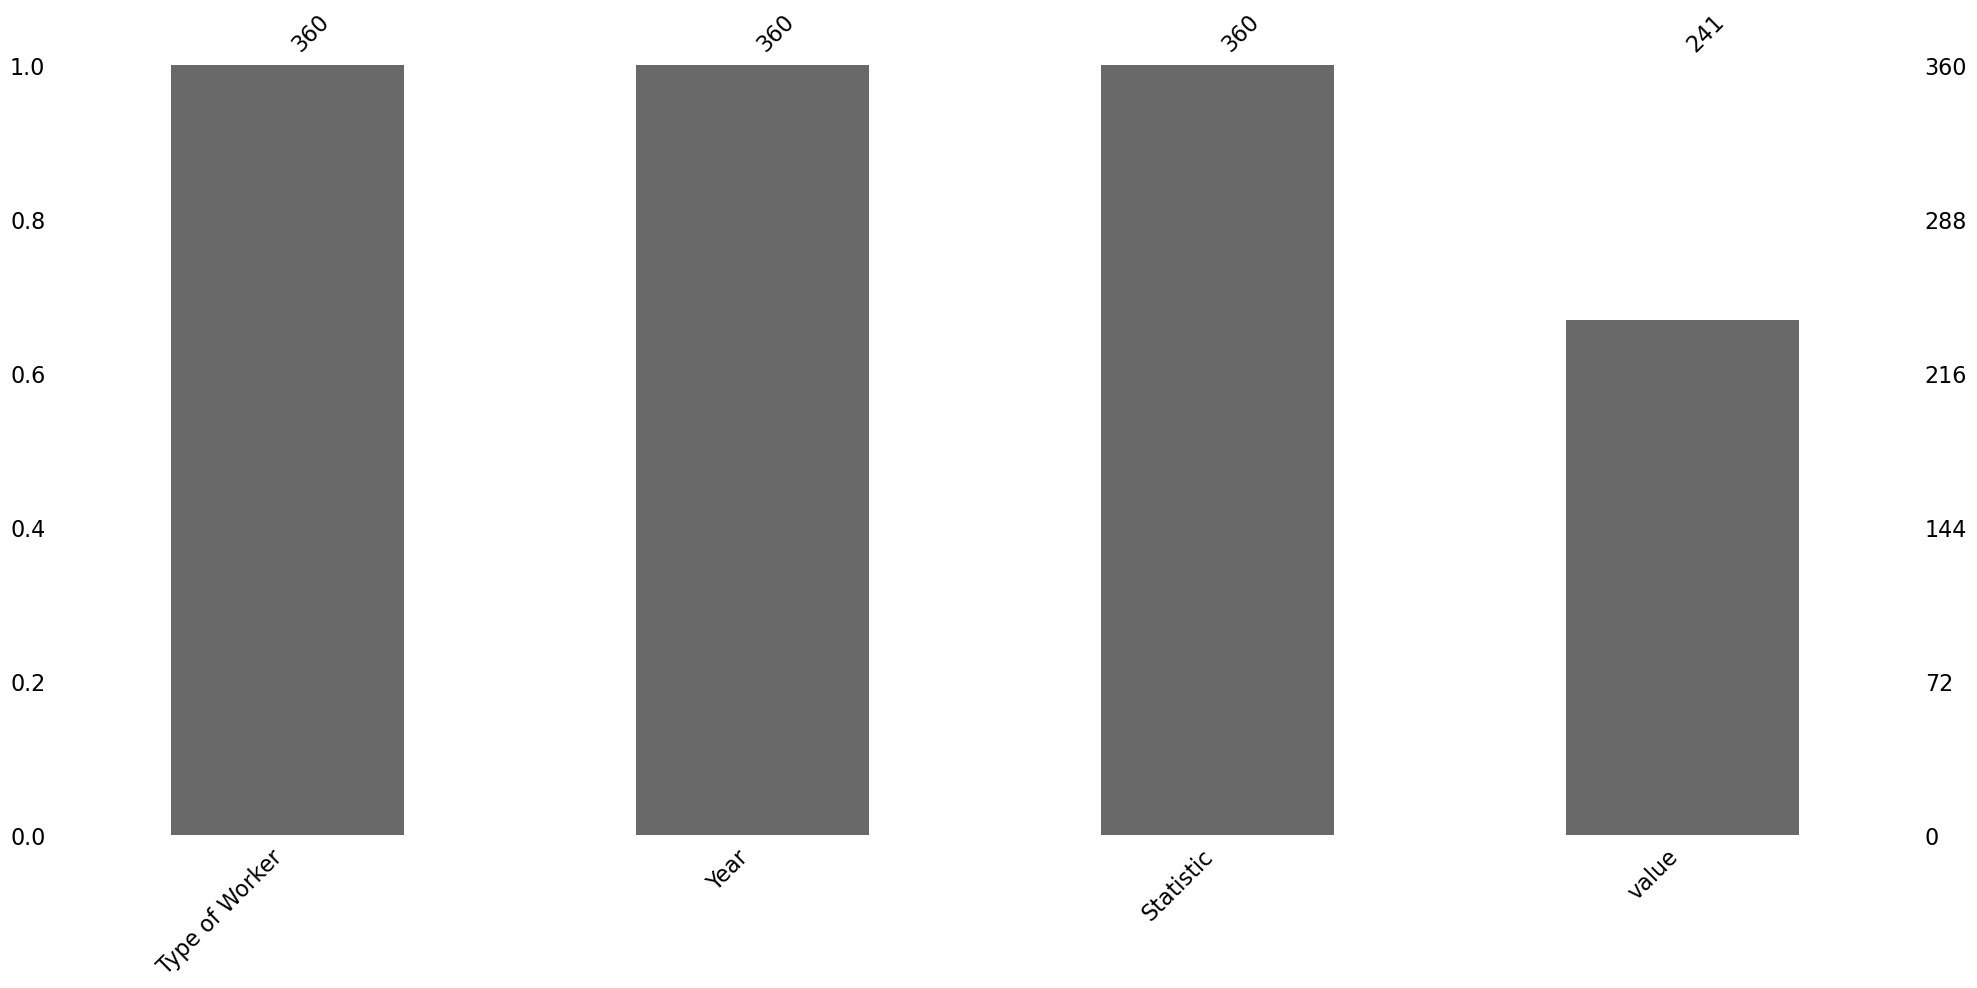

In [161]:
#To visualise missing values.All missing values are in the 'value' column

msno.bar(df1C)

<AxesSubplot:>

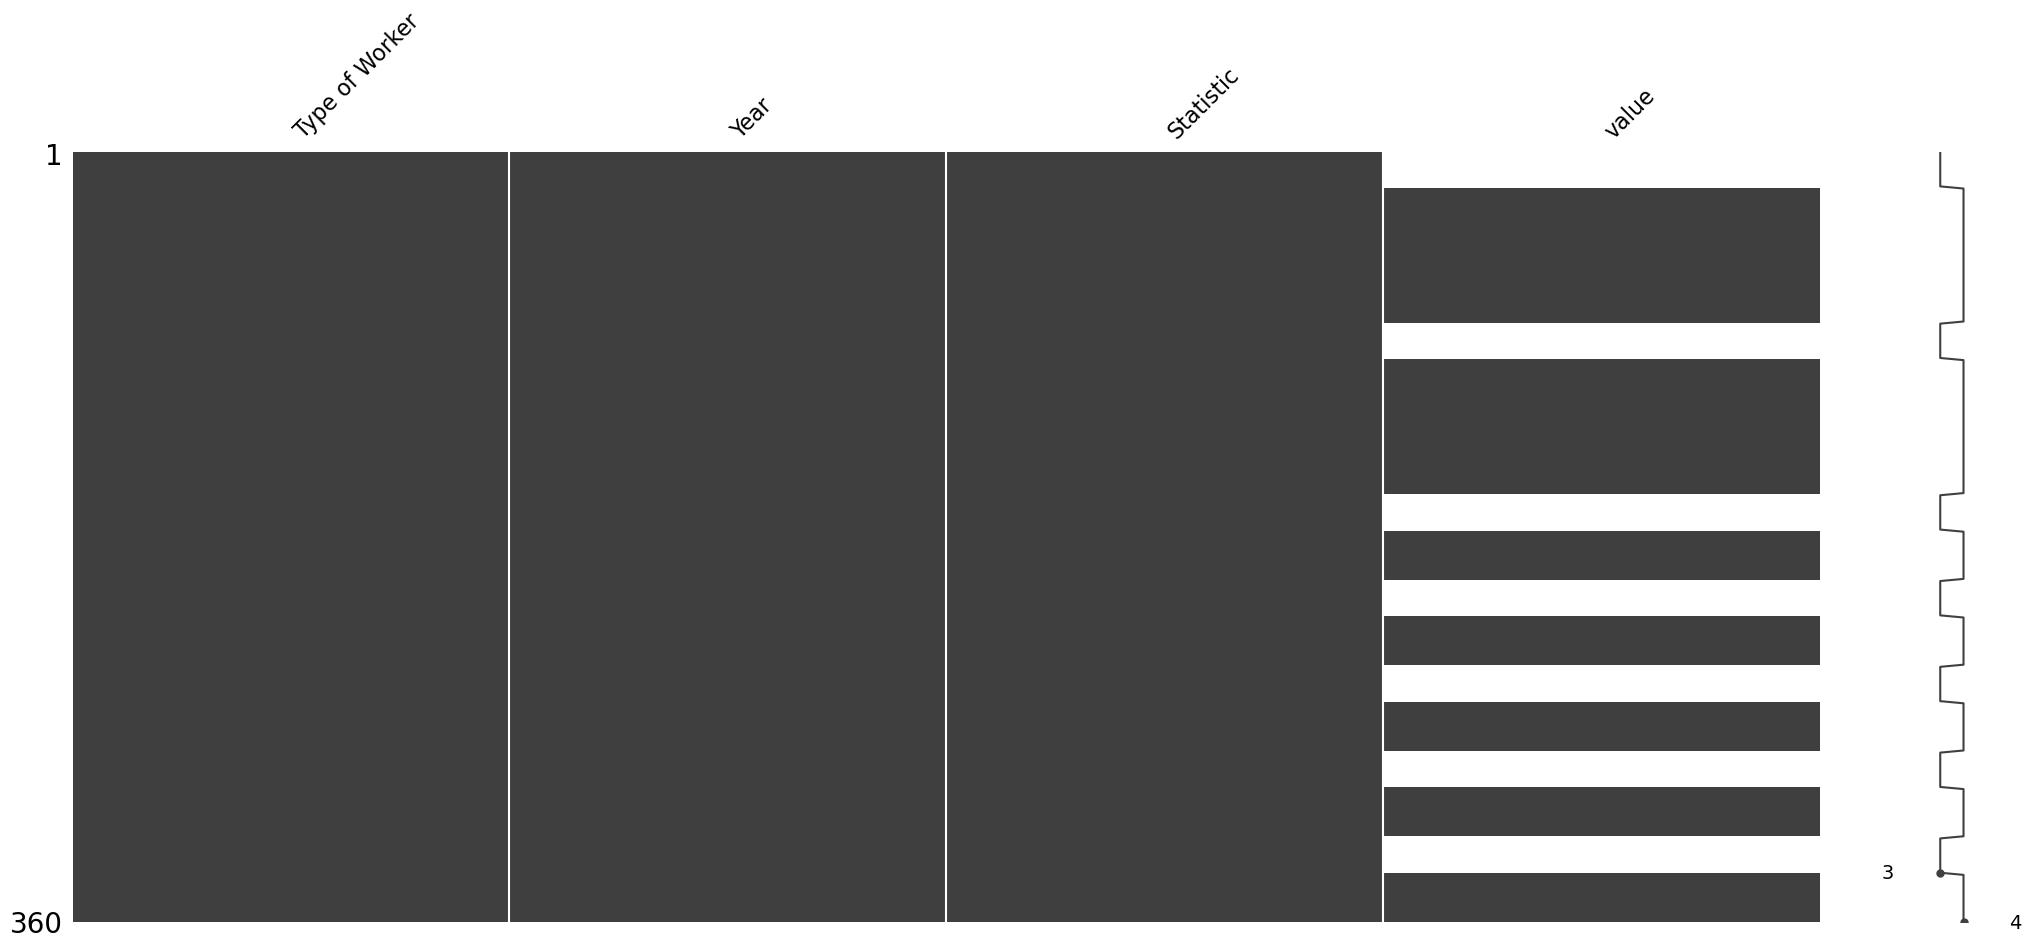

In [162]:
## Can see there is no pattern to the missing data.

msno.matrix(df1C)

In [163]:
#There are a number of null columns. Drop these columns. 

df1C.dropna(inplace=True)

In [165]:
df1null = df1C.isnull().sum()
df1null

Type of Worker    0
Year              0
Statistic         0
value             0
dtype: int64

In [166]:
df1.dtypes

Type of Worker     object
Year                int64
Statistic          object
value             float64
dtype: object

In [167]:
df1['Year'] = df1['Year'].astype(int)

In [168]:
df1.dtypes

Type of Worker     object
Year                int64
Statistic          object
value             float64
dtype: object

In [169]:
df1.describe

<bound method NDFrame.describe of                               Type of Worker  Year  \
0                 All manual employee grades  1969   
1                 All manual employee grades  1970   
2                 All manual employee grades  1971   
3                 All manual employee grades  1972   
4                 All manual employee grades  1973   
..                                       ...   ...   
355  All employees (clerical and operatives)  2004   
356  All employees (clerical and operatives)  2005   
357  All employees (clerical and operatives)  2006   
358  All employees (clerical and operatives)  2007   
359  All employees (clerical and operatives)  2008   

                                             Statistic  value  
0    Average Hours Worked per Week in the Building ...    NaN  
1    Average Hours Worked per Week in the Building ...    NaN  
2    Average Hours Worked per Week in the Building ...    NaN  
3    Average Hours Worked per Week in the Building ...    NaN

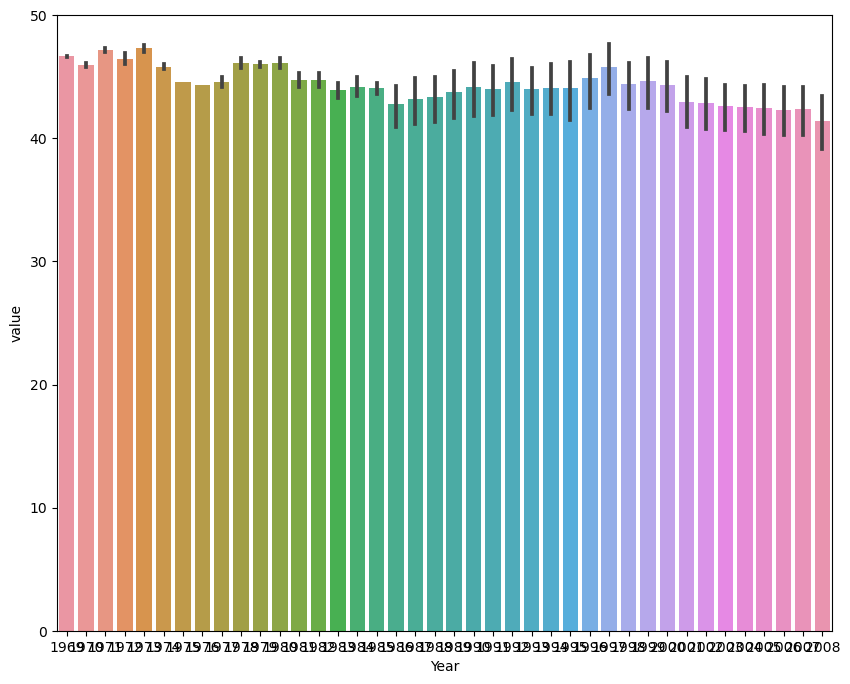

In [176]:
#Year is not showing in chronoligical order - specify sort first.

df1C = df1C.sort_values('Year')

#Plot the graph

plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Year", y="value", data=df1C)

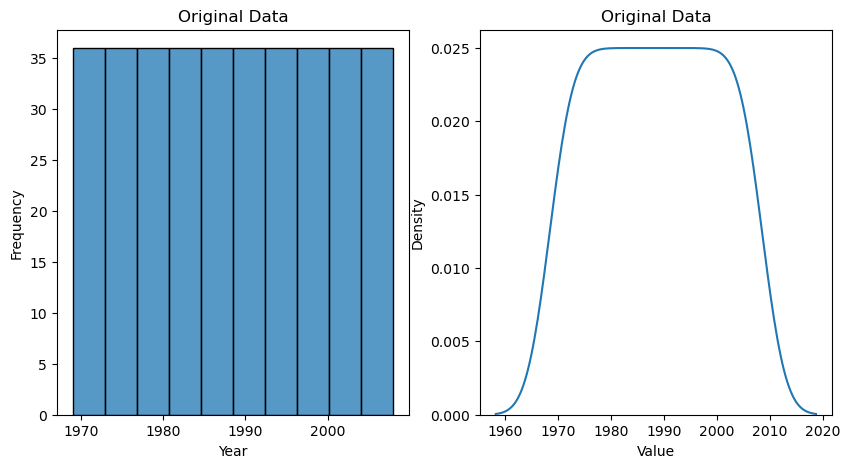

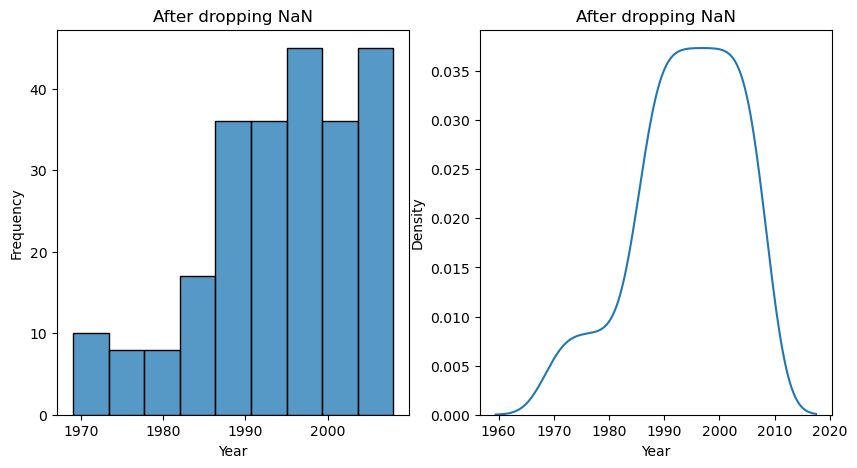

In [171]:
##Create two histograms and two kde plots to compare before and after
#dropping the NaN values to show the effect this has on the spread of data.

#DF1

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.histplot(df1['Year'], ax=ax1)
sns.kdeplot(df1['Year'], ax=ax2)

ax1.set_title('Original Data')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency')

ax2.set_title('Original Data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')

#DF1C

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(10, 5))

sns.histplot(df1C['Year'], ax=ax3)
sns.kdeplot(df1C['Year'], ax=ax4)

ax3.set_title('After dropping NaN')
ax3.set_xlabel('Year')
ax3.set_ylabel('Frequency')

ax4.set_title('After dropping NaN')
ax4.set_xlabel('Year')
ax4.set_ylabel('Density')

plt.show()

<AxesSubplot:xlabel='Year', ylabel='value'>

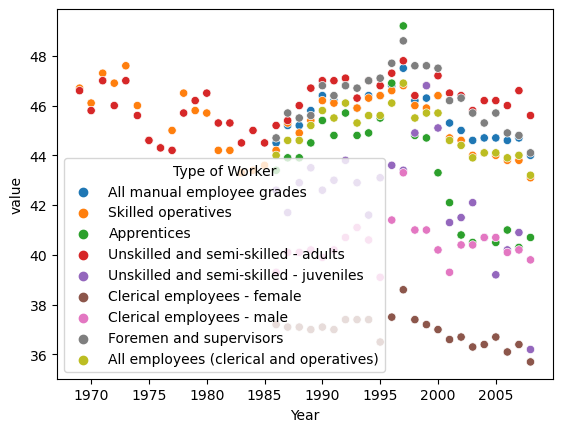

In [175]:
sns.scatterplot(data=df1, x='Year', y='value', hue='Type of Worker')

Remove 'all employees'. Combine clerical. combine adults and juveniles.

In [25]:
#reverts to the tab - file is .tsv#
#The pipe (|) allows multiple seperators 
#\t seperating tabs and ',' seperating commas as are in the column 1 

df2=pd.read_csv("Production_Europe.tsv",sep="\t|,", engine='python')

#### Default parser for read csv does not support seperators greater than one character. Specifying engine=python above so multiple seperators can be used. Required as file as file contains tab and comma delimiters.  

In [26]:
df2.head()

,indic_bt,nace_r2,s_adj,unit,geo\time,2022,2021,2020,2019,2018,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,PROD,B-D_F,CA,I15,AT,128.4,120.7,109.3,115.7,114.2,...,:,:,:,:,:,:,:,:,:,:
1,PROD,B-D_F,CA,I15,BE,121.0 s,121.4 s,106.2 s,111.4 s,107.4 s,...,:,:,:,:,:,:,:,:,:,:
2,PROD,B-D_F,CA,I15,BG,119.5 s,107.5 s,98.6 s,105.1 s,104.0 s,...,:,:,:,:,:,:,:,:,:,:
3,PROD,B-D_F,CA,I15,CH,124.6,119.2,110.5,114.2,110.4,...,:,:,:,:,:,:,:,:,:,:
4,PROD,B-D_F,CA,I15,CY,148.6 s,150.5 s,142.3 s,153.1 s,142.9 s,...,:,:,:,:,:,:,:,:,:,:


In [27]:
df2=df2.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [28]:
#Want to keep unit and geo\time columns the same. Melt the rest of the year columns

df2=pd.melt(df2, id_vars=["unit","geo\\time"], var_name="Year",
          value_name="Production")

In [29]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.
df2['Production'] = df2['Production'].str.replace('[^0-9.]+', '', regex=True)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26144 entries, 0 to 26143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unit        26144 non-null  object
 1   geo\time    26144 non-null  object
 2   Year        26144 non-null  object
 3   Production  26144 non-null  object
dtypes: object(4)
memory usage: 817.1+ KB


In [31]:
df2.astype("object").describe()

,unit,geo\time,Year,Production
count,26144,26144,26144,26144
unique,3,40,43,1970
top,I15,AT,2022,
freq,11524,774,608,13146


In [32]:
df2.dtypes

unit          object
geo\time      object
Year          object
Production    object
dtype: object

In [33]:
#When you melt a numerical column it turns to an object/string and you need to change back to integer. 

df2[["Year","Production"]]=df2[["Year","Production"]].apply(pd.to_numeric)

#Insert Geeks for Geeks ref.

In [34]:
df2.dtypes

unit           object
geo\time       object
Year            int64
Production    float64
dtype: object

In [35]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df2 = df2.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [36]:
df2

,unit,geo\time,Year,Production
0,I15,AT,2022,128.4
1,I15,BE,2022,121.0
2,I15,BG,2022,119.5
3,I15,CH,2022,124.6
4,I15,CY,2022,148.6
...,...,...,...,...
26139,I15,SE,1980,NaN
26140,I15,SI,1980,NaN
26141,I15,SK,1980,NaN
26142,I15,TR,1980,NaN


[Text(0.5, 0, 'Production'),
 Text(0, 0.5, 'Production'),
 Text(0.5, 1.0, 'Production Histogram')]

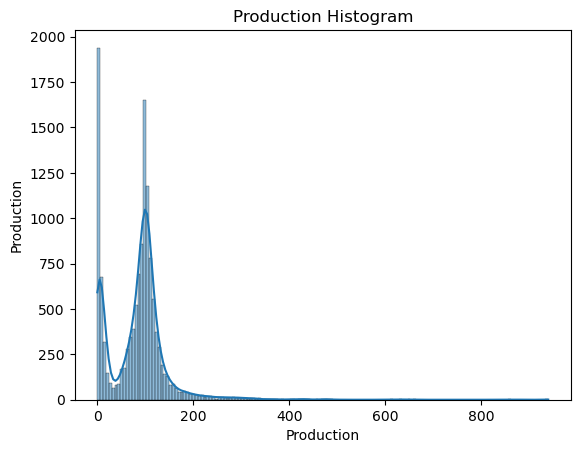

In [37]:
ax = sns.histplot(df2.Production, kde=True)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

In [38]:
df2.dropna(inplace=True)

In [39]:
df2

,unit,geo\time,Year,Production
0,I15,AT,2022,128.4
1,I15,BE,2022,121.0
2,I15,BG,2022,119.5
3,I15,CH,2022,124.6
4,I15,CY,2022,148.6
...,...,...,...,...
24338,I15,IE,1982,7.9
24370,PCH_SM,IE,1982,0.0
24946,I15,IE,1981,7.9
24978,PCH_SM,IE,1981,5.3


[Text(0.5, 0, 'Production'),
 Text(0, 0.5, 'Production'),
 Text(0.5, 1.0, 'Production Histogram')]

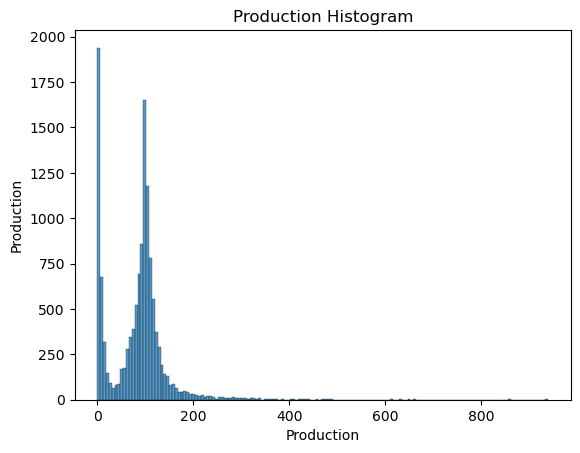

In [40]:
#Determine whether dropping the NaN values affects the distribution of the data

ax = sns.histplot(df2.Production)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

In [41]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [42]:
df3.head()

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN


In [43]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [44]:
df3.head()

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN


In [45]:
df3.dtypes

Month     object
1994      object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016     float64
dtype: object

In [46]:
df3_transposed = df3.set_index('Month').T

In [47]:
df3_transposed

Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111,3.40%
1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,3.30%
1996,115.9,115.7,115.9,115.9,115.9,116,116,116,116.9,117.1,117.2,117.2,116.3,1.40%
1997,118,118.5,118.8,119.8,119.8,119.9,120.8,121,121.5,122,122.6,122.6,120.4,3.50%
1998,122.9,123.1,123.8,123.8,124.5,124.5,125.7,125.7,126,126.2,126.2,126.1,124.9,3.70%
1999,126.3,126.4,126.5,130.5,130.5,130.5,131.5,131.5,134.1,134.7,134.8,134.9,131,4.90%
2000,135.8,136.1,136.4,136.5,136.8,136.9,137.2,137.2,137.7,153.8,153.8,153.9,141,7.60%
2001,154.3,154.7,155.6,157.4,157.6,157.7,161.1,165.9,166,169.3,169.4,169.3,161.5,14.50%
2002,169.9,170,169.5,169.5,169.5,169.7,173.8,173.9,173.9,173.9,174,174.1,171.8,6.40%
2003,174.2,174.5,174.5,177.3,177.3,177.4,177.1,177.2,177.2,177.2,177.2,177.2,176.5,2.70%


In [48]:
df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [49]:
#After transposing the data, all data types show as objects.
#To converted to floats = 
#including the line 'errors=coerce' converts the non numeric values to NaN. 

for col in df3_transposed.columns[0:13]:
    df3_transposed[col] = pd.to_numeric(df3_transposed[col])

In [50]:
df3_transposed.dtypes

Month
January                        float64
February                       float64
March                          float64
April                          float64
May                            float64
June                           float64
July                           float64
August                         float64
September                      float64
October                        float64
November                       float64
December                       float64
Yearly average                 float64
% Increase on previous year     object
dtype: object

In [51]:
df5=pd.read_csv("download1061915290288055378.csv")

In [52]:
df5

,FeatureCode,DateCode,Measurement,Units,Value,Construction indices
0,K02000001,2011 Feb,Costs,NaN,103.1,New Housing
1,K02000001,2011 Feb,Costs,NaN,104.4,All work
2,K02000001,2011 Feb,Costs,NaN,105.0,Other new work
3,K02000001,2011 Feb,Costs,NaN,103.7,Repairs and maintenance
4,K02000001,2016 Aug,Costs,NaN,110.1,New Housing
...,...,...,...,...,...,...
488,K02000001,2018 Apr,Costs,NaN,119.1,Repairs and maintenance
489,K02000001,2018 Apr,Costs,NaN,118.4,All work
490,K02000001,2012 Sep,Costs,NaN,109.8,All work
491,K02000001,2002 Q1,Costs,NaN,117.1,Index of hourly wage costs


In [53]:
df5.tail()

,FeatureCode,DateCode,Measurement,Units,Value,Construction indices
488,K02000001,2018 Apr,Costs,NaN,119.1,Repairs and maintenance
489,K02000001,2018 Apr,Costs,NaN,118.4,All work
490,K02000001,2012 Sep,Costs,NaN,109.8,All work
491,K02000001,2002 Q1,Costs,NaN,117.1,Index of hourly wage costs
492,K02000001,2012 Sep,Costs,NaN,107.1,New Housing


In [54]:
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [55]:
df5.head()

,DateCode,Value,Construction indices
0,2011 Feb,103.1,New Housing
1,2011 Feb,104.4,All work
2,2011 Feb,105.0,Other new work
3,2011 Feb,103.7,Repairs and maintenance
4,2016 Aug,110.1,New Housing


In [56]:
df5.dtypes

DateCode                 object
Value                   float64
Construction indices     object
dtype: object

In [57]:
df5.sort_values(by=["DateCode"], inplace=True)

In [58]:
df5

,DateCode,Value,Construction indices
466,2000 Q1,102.4,Index of hourly wage costs
152,2000 Q2,98.1,Index of hourly wage costs
90,2000 Q3,99.8,Index of hourly wage costs
351,2000 Q4,99.8,Index of hourly wage costs
201,2001 Q1,110.4,Index of hourly wage costs
...,...,...,...
383,2019 May,123.1,New Housing
373,2019 May,124.1,Other new work
372,2019 May,123.2,Repairs and maintenance
370,2019 May,122.7,All work


In [60]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [61]:
df6.head()

,STATISTIC,Statistic Label,C02196V02652,State,TLIST(A1),Year,UNIT,VALUE
0,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1975,1975,Base 2000=100,133.2
1,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1976,1976,Base 2000=100,128.1
2,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1977,1977,Base 2000=100,134.8
3,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1978,1978,Base 2000=100,147.0
4,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1979,1979,Base 2000=100,158.8


In [62]:
df7=pd.read_csv("Labourinput_Europe.tsv",sep="\t|,", engine='python')
#reverts to the tab - file is .tsv#

In [63]:
df7.head()

,indic_bt,nace_r2,s_adj,unit,geo\time,2022,2021,2020,2019,2018,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,EMPL,F,NSA,I10,AL,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,EMPL,F,NSA,I10,AT,:,:,:,:,:,...,104.8,109.5,101.1,102.1,:,:,:,:,:,:
2,EMPL,F,NSA,I10,BE,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,EMPL,F,NSA,I10,BG,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,EMPL,F,NSA,I10,CH,:,:,:,:,:,...,88.0,89.1,:,:,:,:,:,:,:,:


In [64]:
df7=df7.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [65]:
df7.head()

,unit,geo\time,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,I10,AL,:,:,:,:,:,:,123.0,115.8,...,:,:,:,:,:,:,:,:,:,:
1,I10,AT,:,:,:,:,:,103.3 p,101.0,100.9,...,104.8,109.5,101.1,102.1,:,:,:,:,:,:
2,I10,BE,:,:,:,:,:,:,101.9 p,100.2,...,:,:,:,:,:,:,:,:,:,:
3,I10,BG,:,:,:,:,:,70.3 p,71.4 p,74.9 p,...,:,:,:,:,:,:,:,:,:,:
4,I10,CH,:,:,:,:,:,103.5,103.9,105.1,...,88.0,89.1,:,:,:,:,:,:,:,:


In [66]:
df7m=df7.melt(id_vars=["geo\\time", "unit"], 
        var_name="Year", 
        value_name="Labour Input")

In [67]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df7m= df7m.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df7m = df7m.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [68]:
df7m

,geo\time,unit,Year,Labour Input
0,AL,I10,2022,NaN
1,AT,I10,2022,NaN
2,BE,I10,2022,NaN
3,BG,I10,2022,NaN
4,CH,I10,2022,NaN
...,...,...,...,...
15934,SE,PCH_SM,1990,NaN
15935,SI,PCH_SM,1990,NaN
15936,SK,PCH_SM,1990,NaN
15937,TR,PCH_SM,1990,NaN


In [69]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.

df7m= df7m.apply(lambda x: x.str.replace('[^0-9.]+', '', regex=True) if x.dtype == "object" else x)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [70]:
df8=pd.read_csv("PriceIndex_BuildingConstruction_Materials_Ireland.csv")

In [71]:
df8.tail()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01409V03262,Type of Material,UNIT,VALUE
635,WPA15C02,Percentage Change over 12 months in Wholesale ...,2022,2022,704,Plaster,%,25.4
636,WPA15C02,Percentage Change over 12 months in Wholesale ...,2022,2022,705,"Paints, oils and varnishes",%,13.0
637,WPA15C02,Percentage Change over 12 months in Wholesale ...,2022,2022,706,Glass,%,5.7
638,WPA15C02,Percentage Change over 12 months in Wholesale ...,2022,2022,708,All other metal fittings,%,2.1
639,WPA15C02,Percentage Change over 12 months in Wholesale ...,2022,2022,709,All other products,%,12.1


In [72]:
df8=df8.drop(["STATISTIC", "TLIST(A1)", "C01409V03262"], axis=1)

In [73]:
df8

,Statistic Label,Year,Type of Material,UNIT,VALUE
0,Wholesale Price Index (Excl VAT) for Building ...,2015,Materials,Base 2015=100,100.0
1,Wholesale Price Index (Excl VAT) for Building ...,2015,"Stone, sand and gravel",Base 2015=100,100.0
2,Wholesale Price Index (Excl VAT) for Building ...,2015,Sand and gravel,Base 2015=100,100.0
3,Wholesale Price Index (Excl VAT) for Building ...,2015,Stone,Base 2015=100,100.0
4,Wholesale Price Index (Excl VAT) for Building ...,2015,Cement,Base 2015=100,100.0
...,...,...,...,...,...
635,Percentage Change over 12 months in Wholesale ...,2022,Plaster,%,25.4
636,Percentage Change over 12 months in Wholesale ...,2022,"Paints, oils and varnishes",%,13.0
637,Percentage Change over 12 months in Wholesale ...,2022,Glass,%,5.7
638,Percentage Change over 12 months in Wholesale ...,2022,All other metal fittings,%,2.1


In [74]:
print(df8.groupby('Type of Material').size())

#To show the different types of material

Type of Material
All other materials                                     16
All other metal fittings                                16
All other products                                      16
Bituminous emulsions                                    16
Bituminous macadam and asphalt                          16
Bituminous macadam, asphalt and bituminous emulsions    16
Cement                                                  16
Concrete blocks and bricks                              16
Copper pipes and fittings                               16
Electrical fittings                                     16
Glass                                                   16
HVAC (heating and ventilation equipment)                16
Insulating materials                                    16
Lighting equipment                                      16
Machined, treated engineered timber                     16
Materials                                               16
Other concrete products (excluding prec

In [75]:
print(df8.groupby('Statistic Label').size())

Statistic Label
Percentage Change over 12 months in Wholesale Price Index                   320
Wholesale Price Index (Excl VAT) for Building and Construction Materials    320
dtype: int64


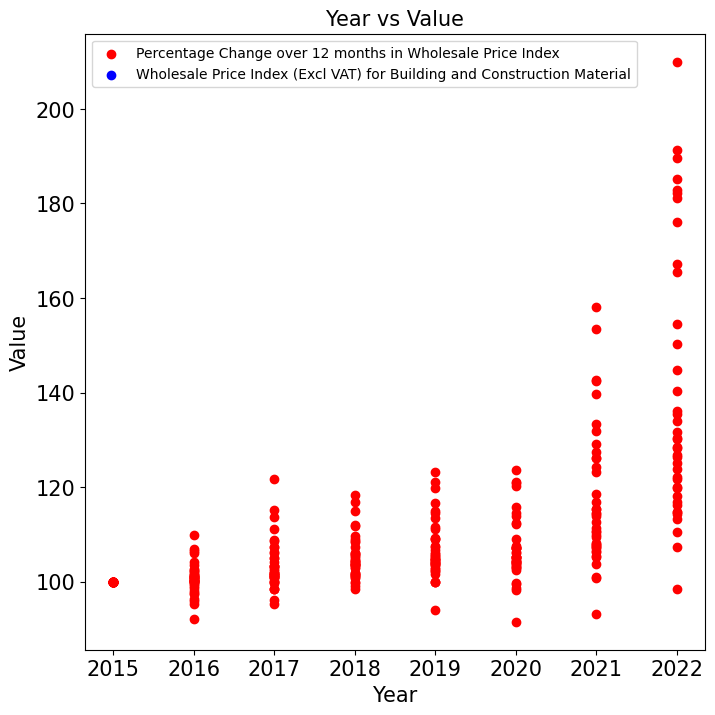

In [76]:
plt.figure(4, figsize=(8, 8))
plt.scatter(df8.iloc[:320, 1], df8.iloc[:320, 4], c='r', label='Percentage Change over 12 months in Wholesale Price Index')

plt.scatter(df8.iloc[640:, 1], df8.iloc[640:, 4], c='b',label='Wholesale Price Index (Excl VAT) for Building and Construction Material')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Value',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Year vs Value',fontsize = 15)
plt.legend(prop={'size': 10})
plt.show()

##Add second Y axis to make % change visible.

In [77]:
##Revisit

# split the column by comma and create new columns for each variable
df8[['Price_Index', '%Change']] = df8['Statistic Label'].str.split(',', expand=True)

# drop the original column
df8.drop('Statistic Label', axis=1, inplace=True)

print(df8)

ValueError: Columns must be same length as key

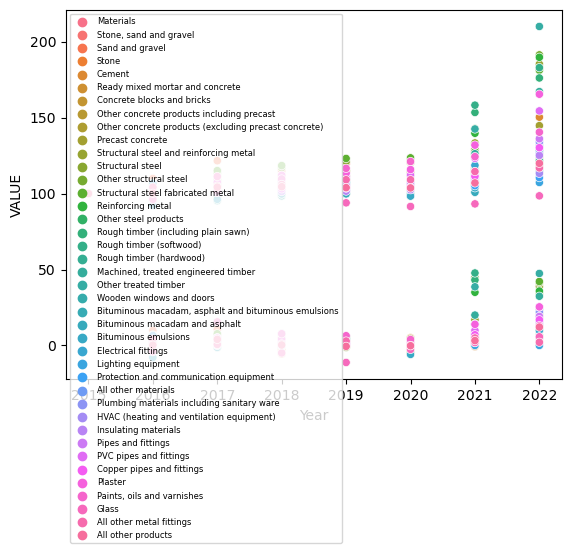

In [78]:
sns.scatterplot(x=df8['Year'], y=df8['VALUE'], hue=df8['Type of Material'])
plt.legend(fontsize=6, loc='upper left')
plt.show()

In [79]:
df9=pd.read_csv("Purchases_BuildingConstruction_New Basis_Ireland.csv")

In [80]:
df9.head()

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
0,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2005,2005,Euro Thousand,3641555.0
1,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2006,2006,Euro Thousand,4371160.0
2,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2007,2007,Euro Thousand,4009412.0
3,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),231,Materials,2005,2005,Euro Thousand,3509030.0
4,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),231,Materials,2006,2006,Euro Thousand,4212084.0


In [81]:
df9.tail()

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
229,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,23224,Fuel oil for stationary uses - other fuel oil,2006,2006,Euro Thousand,NaN
230,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,23224,Fuel oil for stationary uses - other fuel oil,2007,2007,Euro Thousand,NaN
231,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2005,2005,Euro Thousand,226.0
232,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2006,2006,Euro Thousand,271.0
233,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2007,2007,Euro Thousand,571.0


In [82]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          234 non-null    object 
 1   Statistic Label    234 non-null    object 
 2   C02407V02905       234 non-null    int64  
 3   Building Sector    234 non-null    object 
 4   C01989V02424       234 non-null    int64  
 5   Type of Purchases  234 non-null    object 
 6   TLIST(A1)          234 non-null    int64  
 7   Year               234 non-null    int64  
 8   UNIT               234 non-null    object 
 9   VALUE              173 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 18.4+ KB


In [83]:
df9.describe(include="all")

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
count,234,234,234.000000,234,234.000000,234,234.000000,234.000000,234,1.730000e+02
unique,1,1,NaN,6,NaN,13,NaN,NaN,1,NaN
top,BAA07,Purchases in Building and Construction Industr...,NaN,All construction (45),NaN,"All purchases of materials, fuel and energy",NaN,NaN,Euro Thousand,NaN
freq,234,234,NaN,39,NaN,18,NaN,NaN,234,NaN
mean,NaN,NaN,385.000000,NaN,12914.461538,NaN,2006.000000,2006.000000,NaN,2.817845e+05
std,NaN,NaN,152.384059,NaN,11174.226268,NaN,0.818247,0.818247,NaN,8.884327e+05
min,NaN,NaN,45.000000,NaN,23.000000,NaN,2005.000000,2005.000000,NaN,0.000000e+00
25%,NaN,NaN,451.000000,NaN,233.000000,NaN,2005.000000,2005.000000,NaN,1.523000e+03
50%,NaN,NaN,452.500000,NaN,23211.000000,NaN,2006.000000,2006.000000,NaN,9.888000e+03
75%,NaN,NaN,454.000000,NaN,23221.000000,NaN,2007.000000,2007.000000,NaN,5.581500e+04


In [84]:
df9=df9.drop(["STATISTIC","C02407V02905", "C01989V02424", "Statistic Label", "TLIST(A1)"], axis=1)

In [103]:
df9.head()

,Building Sector,Purchase_Type,Year,UNIT,VALUE
0,All construction (45),"All purchases of materials, fuel and energy",2005,Euro Thousand,3641555.0
1,All construction (45),"All purchases of materials, fuel and energy",2006,Euro Thousand,4371160.0
2,All construction (45),"All purchases of materials, fuel and energy",2007,Euro Thousand,4009412.0
3,All construction (45),Materials,2005,Euro Thousand,3509030.0
4,All construction (45),Materials,2006,Euro Thousand,4212084.0


In [104]:
df9 = df9.sort_values('Year')

In [106]:
df9.head()

,Building Sector,Purchase_Type,Year,UNIT,VALUE
0,All construction (45),"All purchases of materials, fuel and energy",2005,Euro Thousand,3641555.0
195,Renting of construction or demolition equipmen...,"All purchases of materials, fuel and energy",2005,Euro Thousand,30692.0
108,Building of complete constructions or part the...,Fuel oil for stationary uses - LPG (bottled gas),2005,Euro Thousand,NaN
105,Building of complete constructions or part the...,Fuel oil for stationary uses - kerosene,2005,Euro Thousand,756.0
102,Building of complete constructions or part the...,"Fuel oil for stationary uses - gas, oil and di...",2005,Euro Thousand,11667.0


In [105]:
df9_05 = df9[df9['Year'] == 2007]
print(df9_05)

                                       Building Sector  \
194                          Building completion (454)   
215  Renting of construction or demolition equipmen...   
176                          Building completion (454)   
227  Renting of construction or demolition equipmen...   
212  Renting of construction or demolition equipmen...   
..                                                 ...   
95   Building of complete constructions or part the...   
92   Building of complete constructions or part the...   
89   Building of complete constructions or part the...   
128                        Building installation (453)   
233  Renting of construction or demolition equipmen...   

                                        Purchase_Type  Year           UNIT  \
194                                       Electricity  2007  Euro Thousand   
215                   Motor fuel - LPG (for vehicles)  2007  Euro Thousand   
176                   Motor fuel - LPG (for vehicles)  2007  Euro Tho

In [93]:
df9 = df9.rename(columns={'Type of Purchases': 'Purchase_Type'})

In [94]:
print(df9.groupby('Purchase_Type').size())

Purchase_Type
All fuel                                              18
All fuel oil for stationary uses                      18
All motor fuel                                        18
All purchases of materials, fuel and energy           18
Electricity                                           18
Fuel oil for stationary uses - LPG (bottled gas)      18
Fuel oil for stationary uses - gas, oil and diesel    18
Fuel oil for stationary uses - kerosene               18
Fuel oil for stationary uses - other fuel oil         18
Materials                                             18
Motor fuel - LPG (for vehicles)                       18
Motor fuel - auto diesel                              18
Motor fuel - petrol                                   18
dtype: int64


In [100]:
print(df9.groupby('Building Sector').size())

Building Sector
All construction (45)                                                           39
Building completion (454)                                                       39
Building installation (453)                                                     39
Building of complete constructions or part there of; civil engineering (452)    39
Renting of construction or demolition equipment with operator (455)             39
Site preparation (451)                                                          39
dtype: int64


<Figure size 640x480 with 0 Axes>

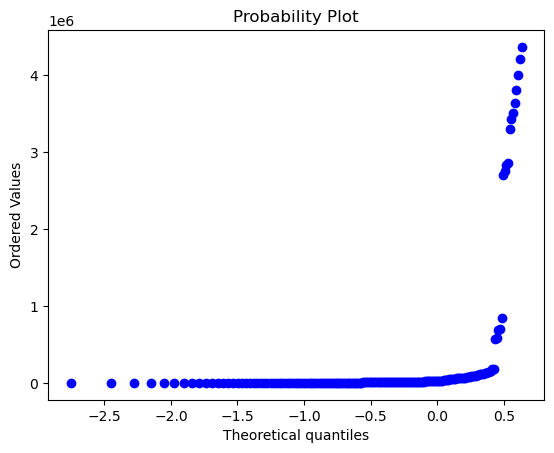

<Figure size 640x480 with 0 Axes>

In [95]:
#Normality plot using 'value' as the variable. 

stats.probplot(df9.VALUE, plot=plt)
plt.figure()

In [96]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "All fuel"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [97]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "Electricity"])

ShapiroResult(statistic=0.6784201860427856, pvalue=4.52942585980054e-05)

In [98]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "Materials"])

ShapiroResult(statistic=0.757086992263794, pvalue=0.00039974116953089833)

In [87]:
#Global construction empoyment numbers in thousand persons.

df10 = pd.read_csv("Global_Con_Employment.csv")

In [88]:
df10.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMPINDUS,CONSTR,THND_PER,A,2018,1178.354,NaN
1,AUS,EMPINDUS,CONSTR,THND_PER,A,2019,1173.967,NaN
2,AUS,EMPINDUS,CONSTR,THND_PER,A,2020,1173.959,NaN
3,AUS,EMPINDUS,CONSTR,THND_PER,A,2021,1149.426,NaN
4,AUS,EMPINDUS,CONSTR,THND_PER,A,2022,1231.692,NaN


In [ ]:
## Indicator, subject and frequency contain the same values for all rows. 
##Flag codes column contains all NaNs so is of no value. Drop these rows.

df10=df10.drop(["INDICATOR","SUBJECT", "FREQUENCY", "Flag Codes"], axis=1)

In [ ]:
df10.head(20)

In [ ]:
#To look at the non numeric columns, include="all".
#This shows the unit of measure is the same for each row. There is 44 unique locations included.

df10.describe(include="all")

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#heat map to see the correlation between different variables.

def feature_interactions(df10,feature1, feature2,continuous_col):
    group = df10.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)

    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6)) #size of the plot.
    sns.heatmap(pivot,cmap='Greens')
    plt.show()

feature_interactions(df10,'LOCATION','TIME','Value')

The large areas of very light green, almost white colour indicate the large number of null values present in the dataset.

In [ ]:
# Using seaborn to create a box plot.
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='TIME', y='Value', data=df10, ax=ax).set(title='Year vs Number of Construction Workers')

ax.set_ylabel('Number of Construction Workers')

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# specifying the y-axis limits
ax.set_ylim(0, 6000)

plt.show()

Can see the presence of outliers for all years.

In [ ]:
mean = df10['Value'].mean()

print(mean)

In [ ]:
median = df10['Value'].median()

print(median)

mean > median therefore the data should be positively skewed when plotted.

In [ ]:
data = df10['Value']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'No. of Construction Workers (Thousands)')

Data is normal. Can conclude the number of construction workers is heavily positively skewed.
Ref - https://gist.github.com/pb111/512c840affb32593d28573fbb764045b